C:\Users\kegem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9223932437635085, tolerance: 1.7807734052412383
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\kegem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.12890443435208, tolerance: 1.7807734052412383
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\kegem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWar

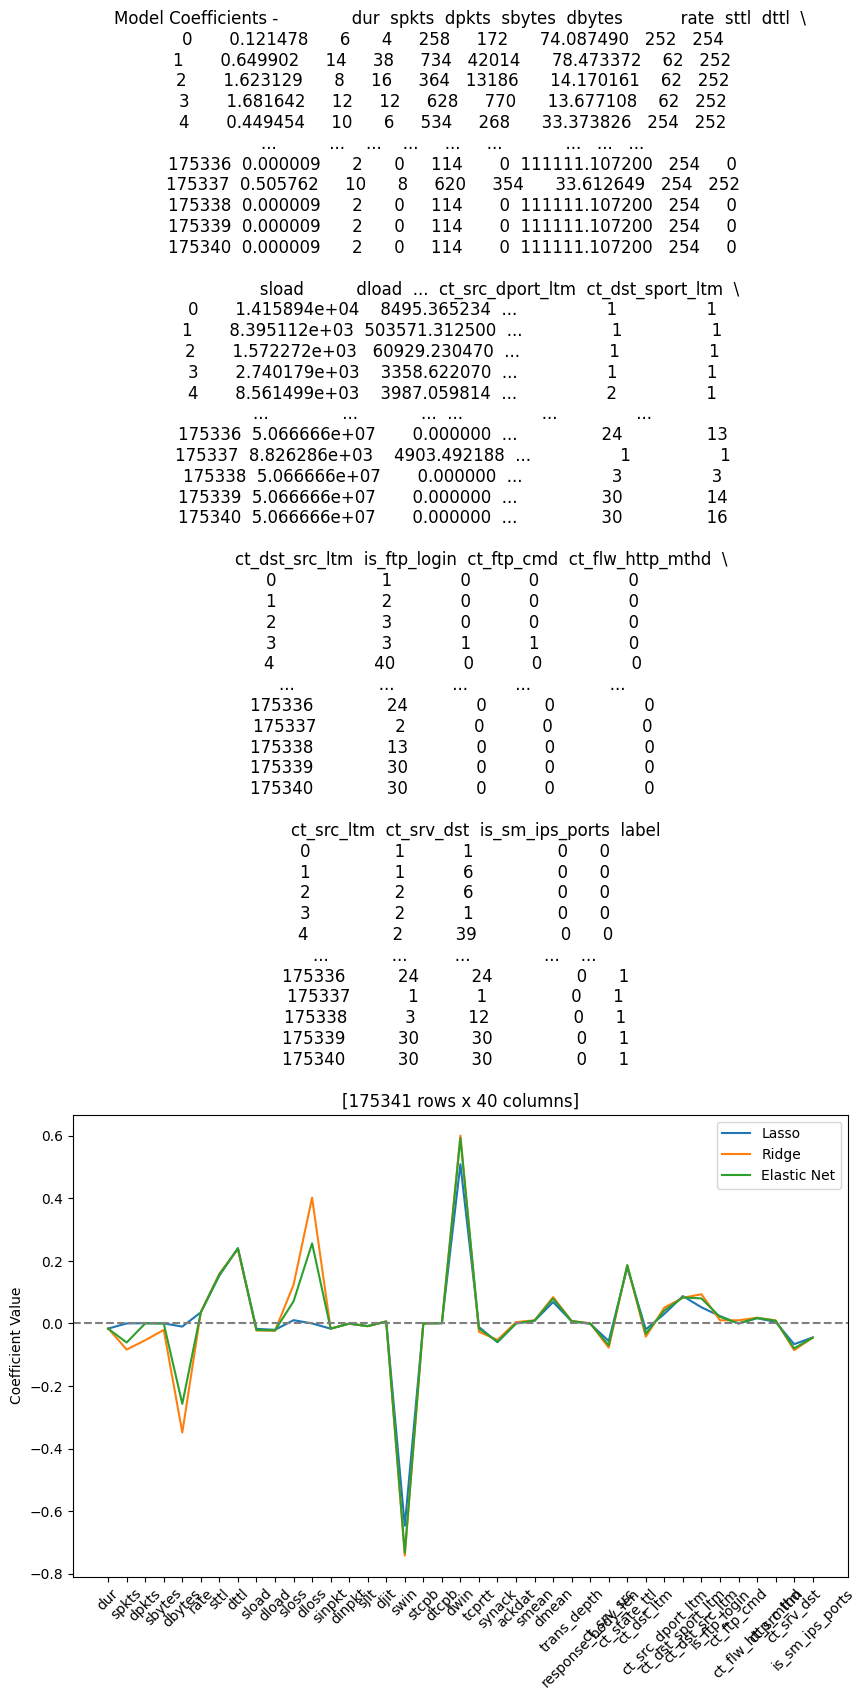

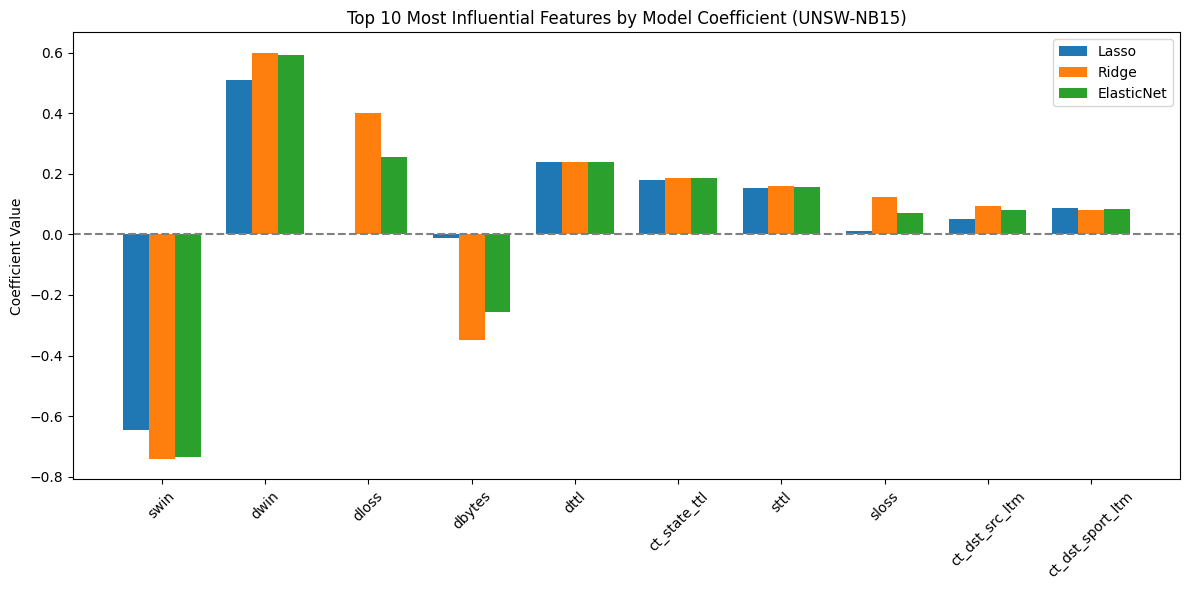

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# --- Load Data ---
unsw_train_path = r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Network Security DataSet\CSV Files\Training and Testing Sets\UNSW_NB15_training-set.csv"
unsw_train = pd.read_csv(unsw_train_path)

# --- Clean & Prepare Data ---
drop_cols = ['id', 'attack_cat', 'proto', 'service', 'state']
unsw_train.drop(columns=[col for col in drop_cols if col in unsw_train.columns], inplace=True)

unsw_train['label'] = pd.to_numeric(unsw_train['label'], errors='coerce')
unsw_train.dropna(subset=['label'], inplace=True)

# Encode categorical variables and remove any remaining NaNs
unsw_train = pd.get_dummies(unsw_train, drop_first=True)
unsw_train.dropna(inplace=True)

# --- Feature/Target Split ---
X = unsw_train.drop(columns='label')
y = unsw_train['label']

# --- Define Models ---
lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, alphas=np.logspace(-3, 3, 100)))
ridge = make_pipeline(StandardScaler(), RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5))
elastic = make_pipeline(StandardScaler(), ElasticNetCV(cv=5, l1_ratio=[.1, .5, .7, .9, .95, .99, 1]))

# --- Fit Models ---
lasso.fit(X, y)
ridge.fit(X, y)
elastic.fit(X, y)

#Visualize Coefficients
plt.figure(figsize=(10, 6))
plt.plot(X.columns, lasso.named_steps['lassocv'].coef_, label='Lasso')
plt.plot(X.columns, ridge.named_steps['ridgecv'].coef_, label='Ridge')
plt.plot(X.columns, elastic.named_steps['elasticnetcv'].coef_, label='Elastic Net')
plt.axhline(0, color='gray', linestyle='--')
plt.title(f"Model Coefficients - {unsw_train}")
plt.ylabel("Coefficient Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# --- Coefficient Analysis ---
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso.named_steps['lassocv'].coef_,
    'Ridge': ridge.named_steps['ridgecv'].coef_,
    'ElasticNet': elastic.named_steps['elasticnetcv'].coef_
})

# --- Plot Bar Charts for Coefficients ---
top_features = coefs.copy()
top_features['importance'] = top_features[['Lasso', 'Ridge', 'ElasticNet']].abs().max(axis=1)
top_features = top_features.sort_values(by='importance', ascending=False).head(10)

bar_width = 0.25
x = np.arange(len(top_features))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, top_features['Lasso'], width=bar_width, label='Lasso')
plt.bar(x, top_features['Ridge'], width=bar_width, label='Ridge')
plt.bar(x + bar_width, top_features['ElasticNet'], width=bar_width, label='ElasticNet')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(x, top_features['Feature'], rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Top 10 Most Influential Features by Model Coefficient (UNSW-NB15)")
plt.legend()
plt.tight_layout()
plt.show()


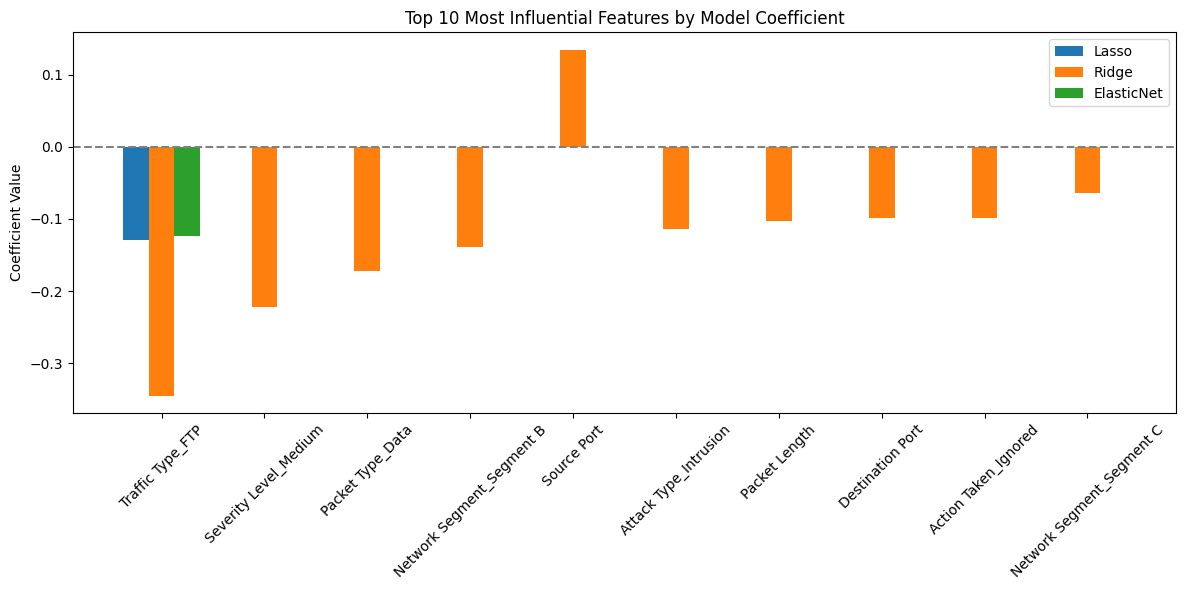

R² Scores on Full Dataset:
 Ridge: 0.0003645336824080747
 Lasso: 9.194101996268245e-05
 ElasticNet: 8.849672984556634e-05

Top 10 Influential Features by Lasso:
                 Feature     Lasso     Ridge  ElasticNet
6       Traffic Type_FTP -0.129416 -0.345106   -0.123291
0            Source Port  0.000000  0.134918    0.000000
1       Destination Port -0.000000 -0.099247   -0.000000
3           Protocol_TCP  0.000000  0.050703    0.000000
2          Packet Length -0.000000 -0.102673   -0.000000
4           Protocol_UDP -0.000000 -0.053217   -0.000000
5       Packet Type_Data -0.000000 -0.172324   -0.000000
7      Traffic Type_HTTP  0.000000  0.007858    0.000000
8  Attack Type_Intrusion -0.000000 -0.114209   -0.000000
9    Attack Type_Malware  0.000000 -0.049505    0.000000

Top 10 Influential Features by Ridge:
                      Feature     Lasso     Ridge  ElasticNet
6            Traffic Type_FTP -0.129416 -0.345106   -0.123291
14      Severity Level_Medium -0.000000 -0.222672

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# --- Load Data ---
cyber_path = r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Cybersecurity Attacks DataSets\cybersecurity_attacks.csv"
cyber = pd.read_csv(cyber_path)

# --- Clean & Prep ---
drop_cols = [
    'Timestamp', 'Source IP Address', 'Destination IP Address', 'Payload Data',
    'User Information', 'Device Information', 'Geo-location Data',
    'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'
]
cyber.drop(columns=[col for col in drop_cols if col in cyber.columns], inplace=True)

cyber['Anomaly Scores'] = pd.to_numeric(cyber['Anomaly Scores'], errors='coerce')
cyber.dropna(subset=['Anomaly Scores'], inplace=True)
cyber = pd.get_dummies(cyber, drop_first=True)
cyber.dropna(inplace=True)

# --- Feature/Target Split ---
X = cyber.drop(columns='Anomaly Scores')
y = cyber['Anomaly Scores']

# --- Define Models ---
ridge = make_pipeline(StandardScaler(), RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5))
lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, alphas=np.logspace(-3, 3, 100)))
elastic = make_pipeline(StandardScaler(), ElasticNetCV(cv=5, l1_ratio=[.1, .5, .7, .9, .95, .99, 1]))

# --- Fit Models ---
ridge.fit(X, y)
lasso.fit(X, y)
elastic.fit(X, y)

# --- Coefficient Comparison ---
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso.named_steps['lassocv'].coef_,
    'Ridge': ridge.named_steps['ridgecv'].coef_,
    'ElasticNet': elastic.named_steps['elasticnetcv'].coef_
})

# --- Plot Bar Charts for Coefficients ---
top_features = coefs.copy()
top_features['importance'] = top_features[['Lasso', 'Ridge', 'ElasticNet']].abs().max(axis=1)
top_features = top_features.sort_values(by='importance', ascending=False).head(10)

bar_width = 0.25
x = np.arange(len(top_features))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, top_features['Lasso'], width=bar_width, label='Lasso')
plt.bar(x, top_features['Ridge'], width=bar_width, label='Ridge')
plt.bar(x + bar_width, top_features['ElasticNet'], width=bar_width, label='ElasticNet')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(x, top_features['Feature'], rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Top 10 Most Influential Features by Model Coefficient")
plt.legend()
plt.tight_layout()
plt.show()

# --- R² Scores ---
print("R² Scores on Full Dataset:")
print(" Ridge:", ridge.score(X, y))
print(" Lasso:", lasso.score(X, y))
print(" ElasticNet:", elastic.score(X, y))

# --- Print Top 10 Features by Model ---
print("\nTop 10 Influential Features by Lasso:")
print(coefs.reindex(coefs['Lasso'].abs().sort_values(ascending=False).index).head(10))

print("\nTop 10 Influential Features by Ridge:")
print(coefs.reindex(coefs['Ridge'].abs().sort_values(ascending=False).index).head(10))

print("\nTop 10 Influential Features by ElasticNet:")
print(coefs.reindex(coefs['ElasticNet'].abs().sort_values(ascending=False).index).head(10))


C:\Users\kegem\AppData\Local\Temp\ipykernel_43956\185499522.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


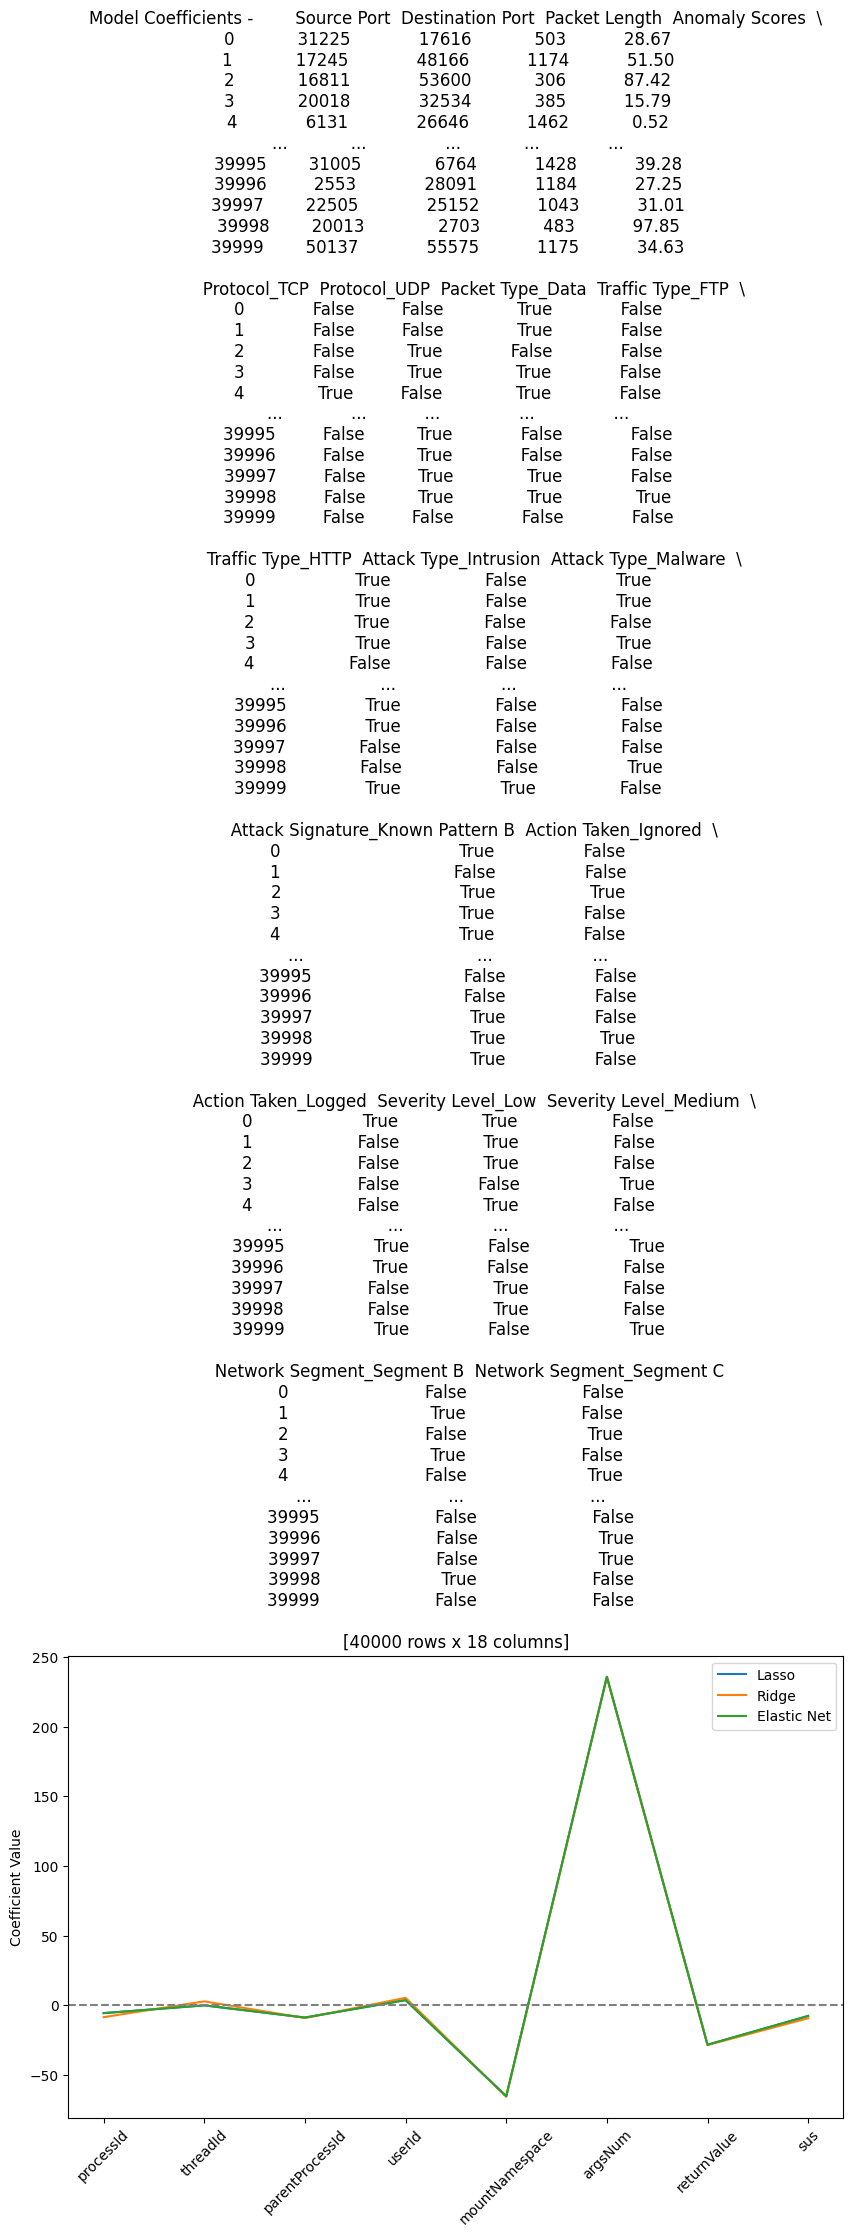

R² Scores on Test Set:
 Ridge: 0.43335245665228583
 Lasso: 0.43335229352017945
 ElasticNet: 0.43335229352017945


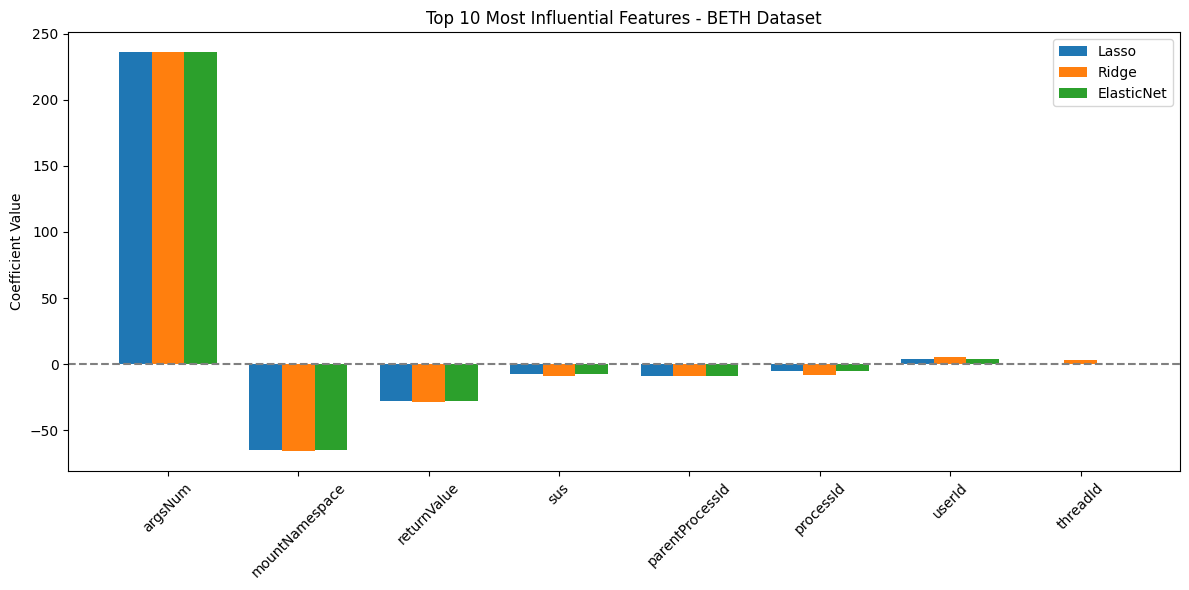

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Load dataset
beth_train_set = r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Beth DataSet\labelled_training_data.csv"
beth_train = pd.read_csv(beth_train_set)

# Drop high-cardinality or unstructured columns
cols_to_drop = ['args', 'stackAddresses', 'hostName', 'processName', 'eventName', 'timestamp']
beth_train.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Ensure numeric eventId (our target)
beth_train['eventId'] = pd.to_numeric(beth_train['eventId'], errors='coerce')
beth_train.dropna(subset=['eventId'], inplace=True)

# Drop missing values from other fields
beth_train.dropna(inplace=True)

# Define X and y
y = beth_train['eventId'].astype(int)
X = beth_train.drop(columns=['evil', 'eventId'], errors='ignore')

# One-hot encode remaining categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipelines
ridge = make_pipeline(StandardScaler(), RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5))
lasso = make_pipeline(StandardScaler(), LassoCV(alphas=None, cv=5, max_iter=10000))
elastic = make_pipeline(StandardScaler(), ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5))

# Fit models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic.fit(X_train, y_train)


#Visualize Coefficients
plt.figure(figsize=(10, 6))
plt.plot(X.columns, lasso.named_steps['lassocv'].coef_, label='Lasso')
plt.plot(X.columns, ridge.named_steps['ridgecv'].coef_, label='Ridge')
plt.plot(X.columns, elastic.named_steps['elasticnetcv'].coef_, label='Elastic Net')
plt.axhline(0, color='gray', linestyle='--')
plt.title(f"Model Coefficients - {cyber}")
plt.ylabel("Coefficient Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Evaluate
print("R² Scores on Test Set:")
print(" Ridge:", r2_score(y_test, ridge.predict(X_test)))
print(" Lasso:", r2_score(y_test, lasso.predict(X_test)))
print(" ElasticNet:", r2_score(y_test, elastic.predict(X_test)))

# --- Coefficient Comparison Bar Plot for Top 10 Influential Features ---
# Build coefficient dataframe
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso.named_steps['lassocv'].coef_,
    'Ridge': ridge.named_steps['ridgecv'].coef_,
    'ElasticNet': elastic.named_steps['elasticnetcv'].coef_
})

# Identify top 10 influential features across all models by max absolute value
coef_df['MaxAbs'] = coef_df[['Lasso', 'Ridge', 'ElasticNet']].abs().max(axis=1)
top_features = coef_df.sort_values(by='MaxAbs', ascending=False).head(10)

# Bar plot
bar_width = 0.25
x = np.arange(len(top_features))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, top_features['Lasso'], width=bar_width, label='Lasso')
plt.bar(x, top_features['Ridge'], width=bar_width, label='Ridge')
plt.bar(x + bar_width, top_features['ElasticNet'], width=bar_width, label='ElasticNet')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(x, top_features['Feature'], rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Top 10 Most Influential Features - BETH Dataset")
plt.legend()
plt.tight_layout()
plt.show()
